## 1. Setup and Imports
Import required libraries and utility functions from the cdv_utils package.

In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from cdv_utils.sepsis_loading import *
from cdv_utils.feature_extraction import *
from cdv_utils.analysis_utils import *
from cdv_utils.transform_utils import *

print("Libraries and utilities imported successfully.")

Libraries and utilities imported successfully.


## 2. Data Loading and Initial Processing
Load the sepsis event log data from XES format and extract basic case information including admission decisions.

In [2]:
# Load the sepsis event log data
print("Loading sepsis event log data...")
df = load_sepsis_data("datasets/Sepsis Cases - Event Log.xes.gz")

print(f"Loaded {len(df)} events for {df['case_id'].nunique()} cases")
print(f"Columns: {list(df.columns)}")
df.head()

Loading sepsis event log data...


parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 2905.86it/s]


Loaded 15214 events for 1050 cases
Columns: ['InfectionSuspected', 'org:group', 'DiagnosticBlood', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion', 'DiagnosticArtAstrup', 'act', 'Age', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature', 'ts', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'lifecycle:transition', 'Diagnose', 'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG', 'case_id', 'Leucocytes', 'CRP', 'LacticAcid']


,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,act,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case_id,Leucocytes,CRP,LacticAcid
0,True,A,True,True,True,True,True,True,True,ER Registration,...,True,complete,A,False,True,True,A,NaN,NaN,NaN
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN


In [3]:
# Extract admission decisions for each case
print("Extracting admission decisions...")
df_sepsis = extract_admission_decisions(df)

print(f"Cases with admission decisions: {len(df_sepsis)}")
df_sepsis.head()

Extracting admission decisions...
Cases with admission decisions: 810


,case_id,admission_decision,admission_ts
0,A,NC,2014-10-22 14:13:19+00:00
1,B,NC,2014-12-21 13:17:08+00:00
2,C,NC,2014-02-09 22:53:46+00:00
3,D,NC,2014-07-10 14:07:02+00:00
5,F,NC,2014-05-07 22:03:00+00:00


In [4]:
# Analyze admission decision distribution
print("Admission Decision Analysis:")
admission_dist = analyze_admission_decision_distribution(df_sepsis)

Admission Decision Analysis:
Admission Decision Distribution:
Counts:
admission_decision
NC    738
IC     72
Name: count, dtype: int64

Proportions:
admission_decision
NC    0.911111
IC    0.088889
Name: proportion, dtype: float64


In [5]:
# Extract pre-admission activity sequences
print("Extracting pre-admission activity sequences...")
df_sepsis = extract_activity_sequences(df, df_sepsis)

print("\nMost common pre-admission sequences:")
print(df_sepsis['pre_admission_sequence'].value_counts(normalize=True).head(10))

Extracting pre-admission activity sequences...

Most common pre-admission sequences:
pre_admission_sequence
CRP,ER Registration,ER Sepsis Triage,ER Triage,IV Antibiotics,IV Liquid,LacticAcid,Leucocytes                   0.696296
CRP,ER Registration,ER Sepsis Triage,ER Triage,IV Antibiotics,LacticAcid,Leucocytes                             0.087654
CRP,ER Registration,ER Sepsis Triage,ER Triage,Leucocytes                                                       0.062963
CRP,ER Registration,ER Sepsis Triage,ER Triage,LacticAcid,Leucocytes                                            0.056790
CRP,ER Registration,ER Sepsis Triage,ER Triage,IV Antibiotics,IV Liquid,Leucocytes                              0.025926
CRP,CRP,ER Registration,ER Sepsis Triage,ER Triage,IV Antibiotics,IV Liquid,LacticAcid,Leucocytes,Leucocytes    0.013580
CRP,ER Registration,ER Sepsis Triage,ER Triage,IV Antibiotics,Leucocytes                                        0.011111
ER Registration,ER Sepsis Triage,ER Triage,Le

## 3. Feature Extraction
Extract detailed features from pre-admission events, including variables, measurements, and computed features.

In [6]:
# Extract pre-admission variables with their values
print("Extracting pre-admission variables...")
pre_admission_vars = extract_pre_admission_variables_with_values(df)

# Add pre-admission variables summary to the dataframe
df_sepsis['pre_admission_variables'] = df_sepsis['case_id'].map(
    lambda x: ','.join(pre_admission_vars.get(x, []))
)

print("\nMost common pre-admission variable combinations:")
print(df_sepsis['pre_admission_variables'].value_counts(normalize=True).head(5))

Extracting pre-admission variables...

Most common pre-admission variable combinations:
pre_admission_variables
Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,DiagnosticXthorax,DisfuncOrg,Hypotensie,Hypoxie,InfectionSuspected,Infusion,LacticAcid,Leucocytes,Oligurie,SIRSCritHeartRate,SIRSCritLeucos,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore    0.803704
Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,DiagnosticXthorax,DisfuncOrg,Hypotensie,Hypoxie,InfectionSuspected,Infusion,Leucocytes,Oligurie,SIRSCritHeartRate,SIRSCritLeucos,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore               0.087654
Age,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,D

In [7]:
# Extract detailed pre-admission features
print("Extracting detailed pre-admission features...")
pre_admission_features = extract_pre_admission_features(df, df_sepsis)

# Merge with existing sepsis data
df_sepsis_extended = pd.merge(df_sepsis, pre_admission_features, on='case_id', how='left')

print(f"Extended dataset shape: {df_sepsis_extended.shape}")
print(f"Total features: {len(df_sepsis_extended.columns)}")
df_sepsis_extended.head()

Extracting detailed pre-admission features...
Extended dataset shape: (810, 38)
Total features: 38


,case_id,admission_decision,admission_ts,pre_admission_sequence,pre_admission_variables,pre_admission_activities,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,...,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid,cycle_time,Leucocytes_2,CRP_2,LacticAcid_2,LacticAcid_3
0,A,NC,2014-10-22 14:13:19+00:00,"CRP,ER Registration,ER Sepsis Triage,ER Triage...","Age,CRP,Diagnose,DiagnosticArtAstrup,Diagnosti...","CRP,ER Registration,ER Sepsis Triage,ER Triage...",True,True,True,True,...,True,True,9.6,21.0,2.2,10086.0,NaN,NaN,NaN,NaN
1,B,NC,2014-12-21 13:17:08+00:00,"CRP,ER Registration,ER Sepsis Triage,ER Triage...","Age,CRP,Diagnose,DiagnosticArtAstrup,Diagnosti...","CRP,ER Registration,ER Sepsis Triage,ER Triage...",True,True,False,True,...,True,True,13.8,240.0,0.8,5371.0,NaN,NaN,NaN,NaN
2,C,NC,2014-02-09 22:53:46+00:00,"CRP,ER Registration,ER Sepsis Triage,ER Triage...","Age,CRP,Diagnose,DiagnosticArtAstrup,Diagnosti...","CRP,ER Registration,ER Sepsis Triage,ER Triage...",True,True,False,False,...,True,True,15.4,27.0,NaN,2270.0,NaN,NaN,NaN,NaN
3,D,NC,2014-07-10 14:07:02+00:00,"CRP,ER Registration,ER Sepsis Triage,ER Triage...","Age,CRP,Diagnose,DiagnosticArtAstrup,Diagnosti...","CRP,ER Registration,ER Sepsis Triage,ER Triage...",True,True,False,True,...,False,True,7.7,171.0,1.6,3905.0,NaN,NaN,NaN,NaN
4,F,NC,2014-05-07 22:03:00+00:00,"CRP,ER Registration,ER Sepsis Triage,ER Triage...","Age,CRP,Diagnose,DiagnosticArtAstrup,Diagnosti...","CRP,ER Registration,ER Sepsis Triage,ER Triage...",True,True,False,False,...,False,True,18.8,15.0,2.3,11071.0,NaN,NaN,NaN,NaN


## 4. Variant Analysis
Analyze the distribution of pre-admission variable patterns and create variant groups for stratified analysis.

Creating variant frequency analysis...


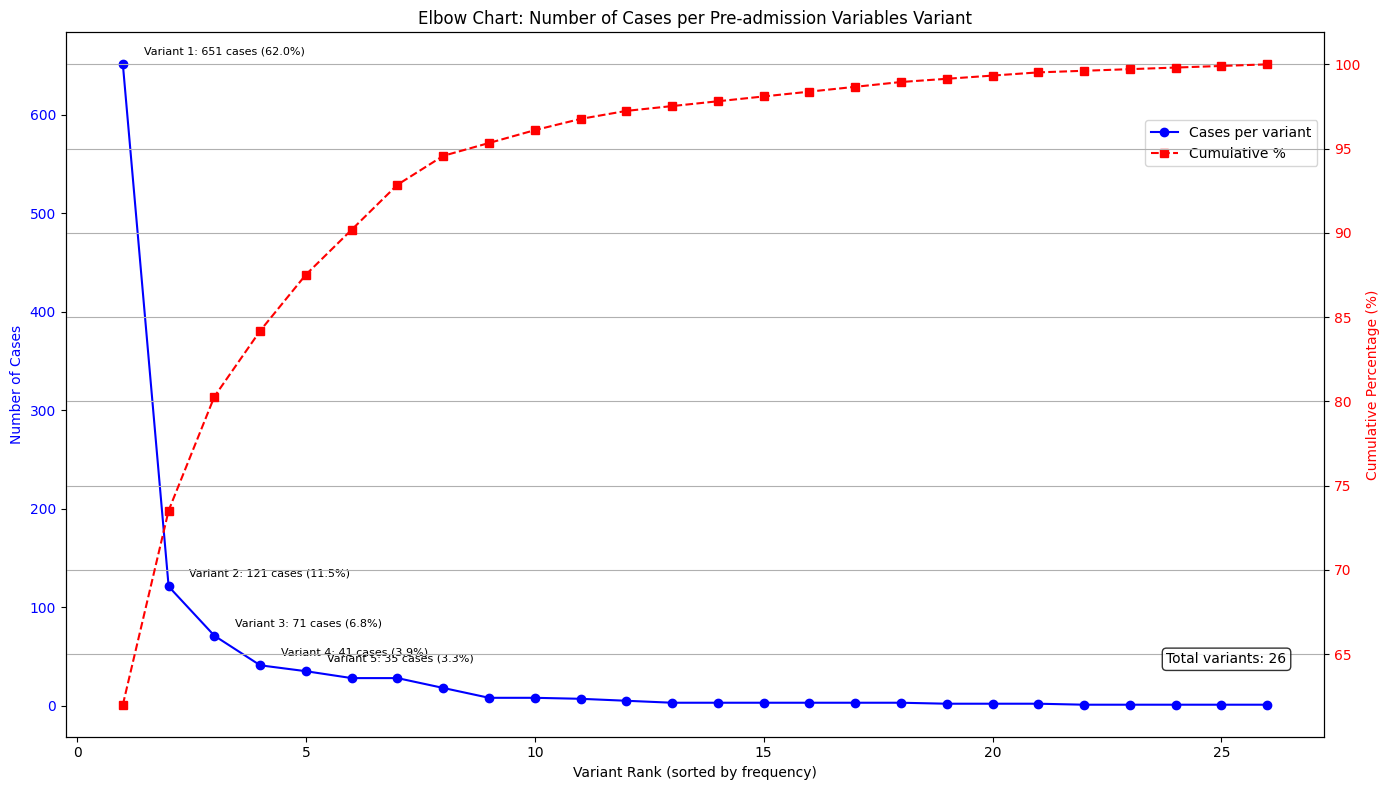

Total number of variants: 26
Most common variant has 651 cases (62.00%)
Top 5 variants cover 919 cases out of 1050 total cases (87.52%)
Number of variants needed to cover 85% of cases: 5


In [8]:
# Create elbow chart to analyze variant distribution
print("Creating variant frequency analysis...")
create_variant_elbow_chart(pre_admission_vars, figsize=(14, 8))

In [9]:
# Assign variants based on frequency (configurable k value)
k = 3  # Number of variant groups
print(f"Assigning cases to {k} variant groups...")

df_sepsis_extended = assign_variants(df_sepsis_extended, k=1)

print(f"\nVariant distribution:")
print(df_sepsis_extended['variant'].value_counts().sort_index())

Assigning cases to 3 variant groups...

Variant distribution:
variant
1    810
Name: count, dtype: int64


In [10]:
# Analyze relationship between variants and admission decisions
print("Analyzing variant vs admission decision relationship:")
abs_crosstab, norm_crosstab = create_variant_admission_crosstab(df_sepsis_extended)

Analyzing variant vs admission decision relationship:
Absolute counts:
admission_decision  IC   NC  All
variant                         
1                   72  738  810
All                 72  738  810

Normalized by variant (row percentages):
admission_decision        IC        NC
variant                               
1                   0.088889  0.911111
All                 0.088889  0.911111


## 5. Data Quality Assessment
Examine data quality, missing values, and potential outliers before final transformation.

In [11]:
# Assess data quality
print("Data Quality Assessment:")
print(f"\nDataset shape: {df_sepsis_extended.shape}")
print(f"Missing values per column:")
missing_values = df_sepsis_extended.isnull().sum()
missing_pct = (missing_values / len(df_sepsis_extended)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_pct
})[missing_values > 0].sort_values('Missing %', ascending=False)

print(missing_summary.head(10))

Data Quality Assessment:

Dataset shape: (810, 39)
Missing values per column:
              Missing Count  Missing %
LacticAcid_3            809  99.876543
LacticAcid_2            803  99.135802
CRP_2                   795  98.148148
Leucocytes_2            790  97.530864
LacticAcid               97  11.975309
CRP                      52   6.419753
Diagnose                 13   1.604938
Leucocytes                6   0.740741


Cycle Time (Outcome Variable) Distribution:
count      810.000000
mean      7457.646914
std       6753.852831
min        280.000000
25%       2193.250000
50%       6184.500000
75%      10842.500000
max      55704.000000
Name: cycle_time, dtype: float64


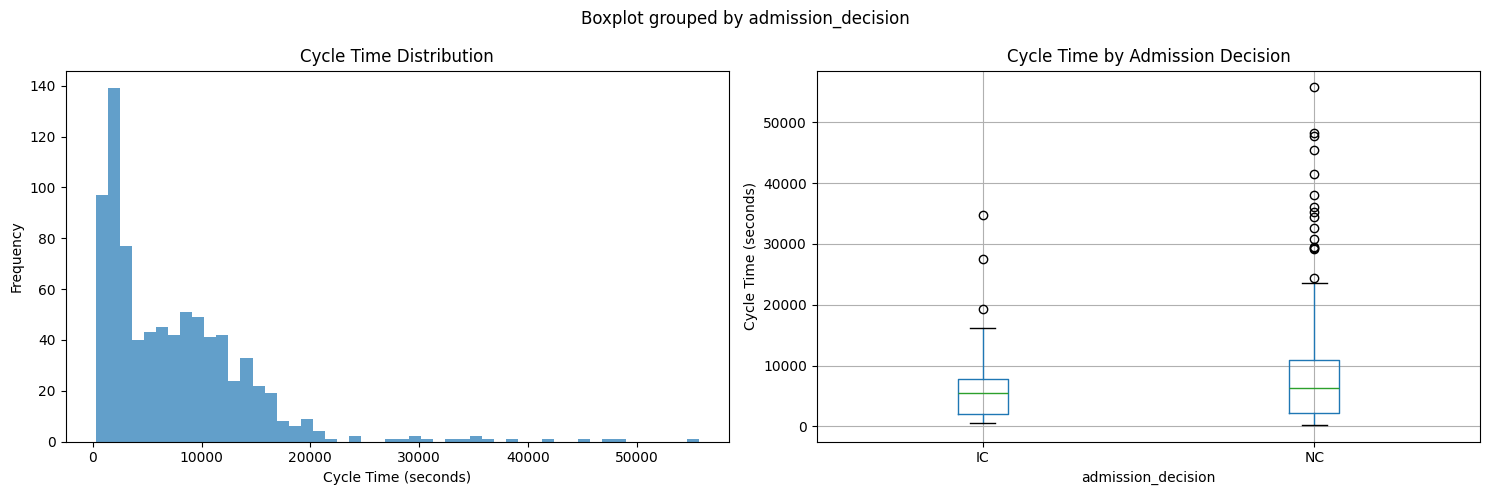


Cases with cycle time > 99th percentile (34659s): 9


In [12]:
# Examine cycle time distribution (our outcome variable)
print("Cycle Time (Outcome Variable) Distribution:")
cycle_time_stats = df_sepsis_extended['cycle_time'].describe()
print(cycle_time_stats)

# Plot distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(df_sepsis_extended['cycle_time'].dropna(), bins=50, alpha=0.7)
ax1.set_title('Cycle Time Distribution')
ax1.set_xlabel('Cycle Time (seconds)')
ax1.set_ylabel('Frequency')

# Box plot by admission decision
df_sepsis_extended.boxplot(column='cycle_time', by='admission_decision', ax=ax2)
ax2.set_title('Cycle Time by Admission Decision')
ax2.set_ylabel('Cycle Time (seconds)')

plt.tight_layout()
plt.show()

# Check for extreme outliers
q99 = df_sepsis_extended['cycle_time'].quantile(0.99)
outliers = df_sepsis_extended[df_sepsis_extended['cycle_time'] > q99]
print(f"\nCases with cycle time > 99th percentile ({q99:.0f}s): {len(outliers)}")

## 6. Data Transformation for RealCause
Transform the processed dataset into the format required by the RealCause framework.

In [13]:
# Transform dataset using complete pipeline
print("Transforming dataset for RealCause framework...")

df_realcause = complete_transformation_pipeline(
    df_sepsis_extended=df_sepsis_extended,
    outcome_column='cycle_time',
    decision_column='admission_decision',
    treatment_mapping={'IC': 1, 'NC': 0},
    max_outcome_value=65760,  # Filter extreme outliers
    columns_to_drop=['Diagnose'],  # Drop problematic columns
    output_file="datasets/sepsis_cases.csv"
)

Transforming dataset for RealCause framework...
Starting transformation pipeline...
Step 1 - Initial RealCause format: (810, 37)
Step 2 - Treatment encoded
Step 3 - Boolean columns converted
Filtered dataset: 810 cases (removed 0 outliers)
Step 4 - Outliers filtered: (810, 37)
Dropped columns: ['Diagnose']
Step 5 - Dataset cleaned: (810, 36)
Dataset saved to datasets/sepsis_cases.csv
Shape: (810, 36)
Columns: ['InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion', 'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG', 'Leucocytes', 'CRP', 'LacticAcid', 'Leucocytes_2', 'CRP_2', 'LacticAcid_2', 'LacticAcid_3', 'variant', 't', 'y', 'y0', 'y1', 'ite']
Transformation pipel

In [14]:
# Final dataset summary
print("\n=== FINAL REALCAUSE DATASET SUMMARY ===")
print(f"Shape: {df_realcause.shape}")
print(f"Features: {df_realcause.shape[1] - 5} (excluding t, y, y0, y1, ite)")
print(f"\nTreatment distribution:")
print(df_realcause['t'].value_counts())
print(f"\nOutcome statistics:")
print(df_realcause['y'].describe())

print(f"\nColumn types:")
dtype_summary = df_realcause.dtypes.value_counts()
print(dtype_summary)

print(f"\nMissing values in final dataset:")
final_missing = df_realcause.isnull().sum().sum()
print(f"Total missing values: {final_missing}")


=== FINAL REALCAUSE DATASET SUMMARY ===
Shape: (810, 36)
Features: 31 (excluding t, y, y0, y1, ite)

Treatment distribution:
t
0    738
1     72
Name: count, dtype: int64

Outcome statistics:
count      810.000000
mean      7457.646914
std       6753.852831
min        280.000000
25%       2193.250000
50%       6184.500000
75%      10842.500000
max      55704.000000
Name: y, dtype: float64

Column types:
int64      24
float64    12
Name: count, dtype: int64

Missing values in final dataset:
Total missing values: 5782


In [15]:
# Display sample of final dataset
print("Sample of final RealCause dataset:")
df_realcause.head(10)

Sample of final RealCause dataset:


,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,...,Leucocytes_2,CRP_2,LacticAcid_2,LacticAcid_3,variant,t,y,y0,y1,ite
0,1,1,1,1,1,1,1,1,85.0,1,...,NaN,NaN,NaN,NaN,1,0,10086.0,NaN,NaN,NaN
1,1,1,0,1,0,1,1,0,45.0,1,...,NaN,NaN,NaN,NaN,1,0,5371.0,NaN,NaN,NaN
2,1,1,0,0,0,1,1,1,55.0,1,...,NaN,NaN,NaN,NaN,1,0,2270.0,NaN,NaN,NaN
3,1,1,0,1,0,1,1,1,70.0,1,...,NaN,NaN,NaN,NaN,1,0,3905.0,NaN,NaN,NaN
4,1,1,0,0,0,1,1,0,50.0,1,...,NaN,NaN,NaN,NaN,1,0,11071.0,NaN,NaN,NaN
5,1,1,0,0,0,1,1,0,60.0,1,...,NaN,NaN,NaN,NaN,1,0,2413.0,NaN,NaN,NaN
6,0,0,0,1,0,1,0,0,80.0,0,...,NaN,NaN,NaN,NaN,1,1,1918.0,NaN,NaN,NaN
7,1,1,0,0,0,1,0,1,80.0,1,...,NaN,NaN,NaN,NaN,1,0,1257.0,NaN,NaN,NaN
8,1,1,0,1,0,1,1,0,80.0,1,...,NaN,NaN,NaN,NaN,1,0,4455.0,NaN,NaN,NaN
9,1,1,0,1,0,1,1,0,50.0,1,...,NaN,NaN,NaN,NaN,1,0,10591.0,NaN,NaN,NaN


## 7. Dataset Validation
Perform final validation checks on the transformed dataset.

In [16]:
# Validation checks
print("=== DATASET VALIDATION ===")

# Check treatment variable
treatment_check = set(df_realcause['t'].dropna().unique()) == {0, 1}
print(f"✓ Treatment variable properly encoded (0/1): {treatment_check}")

# Check for infinite values
infinite_check = not np.isinf(df_realcause.select_dtypes(include=[np.number])).any().any()
print(f"✓ No infinite values: {infinite_check}")

# Check outcome variable
outcome_positive = (df_realcause['y'] > 0).all()
print(f"✓ All outcome values positive: {outcome_positive}")

# Check for duplicate cases
no_duplicates = not df_realcause.duplicated().any()
print(f"✓ No duplicate rows: {no_duplicates}")

# Check column data types
numeric_features = df_realcause.drop(columns=['y0', 'y1', 'ite']).select_dtypes(include=[np.number]).shape[1]
total_features = df_realcause.shape[1] - 3  # excluding y0, y1, ite
print(f"✓ Numeric features: {numeric_features}/{total_features}")

print(f"\n✅ Dataset ready for RealCause analysis!")
print(f"📁 Saved to: datasets/sepsis_cases.csv")

=== DATASET VALIDATION ===
✓ Treatment variable properly encoded (0/1): True
✓ No infinite values: True
✓ All outcome values positive: True
✓ No duplicate rows: True
✓ Numeric features: 33/33

✅ Dataset ready for RealCause analysis!
📁 Saved to: datasets/sepsis_cases.csv


## Summary

This notebook has successfully:

1. **Loaded** the sepsis event log data from XES format
2. **Extracted** admission decisions and pre-admission features for each case
3. **Analyzed** variant patterns in pre-admission variables
4. **Transformed** the dataset into RealCause format with:
   - Treatment variable (t): IC admission = 1, NC admission = 0
   - Outcome variable (y): Cycle time (duration of pre-admission process)
   - Feature variables: Pre-admission measurements, activities, and computed features
5. **Validated** the final dataset for causal analysis

The resulting dataset is now ready for causal inference analysis using the RealCause framework to estimate the causal effect of admission decisions on process cycle times.